# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [47]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        #print('instance',instance)
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    output = 0
    for i in range(len(array1)):
        output += array1[i]*array2[i]
    #print('output', output)
    return output 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    e = 2.71828182846
    
    
    out = 1/(1+math.pow(e, -x))
    #print('sigmoid', out)    
    return out

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    output = dot_product(weight, instance)
    
    return sigmoid(output)

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    output = dot_product(weights, instance)
    output = sigmoid(output)
    #print('output',output)
    output = 1 if output>=0.5 else 0
    #print('predict', output)
    return output


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # Initialize the Perceptron Model weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # Forward propagation, Calculate the loss
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            
            
            error = instance[-1] - output
            #TODO: name these steps
            # Backward propagate ,Update the weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]
                
    #print('weights', weights,lr * error * output * (1-output) * instance[i])
    return weights

## Run it

In [33]:
instances_tr = read_data("train.dat")

instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)


Compared with step activation function, sigmoid activation function can provide more nonlinear changes and is more suitable for solving this nonlinear problems.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [34]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
collection_list = []
for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            collection_list.append([len(pre_instances), epochs, lr, len(instances_te), accuracy])
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



 A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

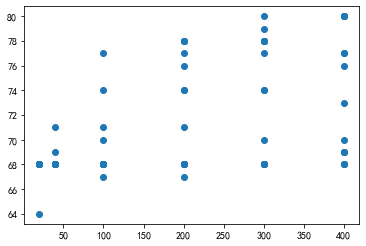

In [35]:
import matplotlib.pyplot as plt
import numpy as np

train_size = [i[0] for i in collection_list]
Accuracy = [i[-1] for i in collection_list]

plt.scatter(train_size, Accuracy)
plt.show()

We can achieve the highest accuracy when we use 300 datasets for training. We don't need to use the whole dataset to get the highest accuracy

B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?

Because the second training results in a lower accuracy on the test dataset.

In [55]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        #print('instance',instance)
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    output = 0
    for i in range(len(array1)):
        output += array1[i]*array2[i]
    #print('output', output)
    return output 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    e = 2.71828182846
    
    
    out = 1/(1+math.pow(e, -x))
    #print('sigmoid', out)    
    return out

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    output = dot_product(weight, instance)
    
    return sigmoid(output)

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    output = dot_product(weights, instance)
    output = sigmoid(output)
    #print('output',output)
    output = 1 if output>=0.5 else 0
    #print('predict', output)
    return output


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs, gamma):

    #TODO: name this step
    # Initialize the Perceptron Model weights
    weights = [0] * (len(instances[0])-1)
    lr = lr*gamma
    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # Forward propagation, Calculate the loss
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            
            
            error = instance[-1] - output
            #TODO: name these steps
            # Backward propagate ,Update the weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]
                
    #print('weights', weights,lr * error * output * (1-output) * instance[i])
    return weights

In [57]:
instances_tr = read_data("train.dat")

instances_te = read_data("test.dat")
lr = 1
gamma = 1.001
epochs = 200
weights = train_perceptron(instances_tr, lr, epochs, gamma)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs: 200, learning rate: 1.000; Accuracy (test, 100 instances): 81.0


C. Can you get higher accuracy with additional hyperparameters (higher than 80.0)?
Yes. We can achieve a higher accuracy by adding a hyperparameter gamma to control the change of the learning rate

 D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
When the size of the training dataset is 400 and the learning rate is 0.050, only 20 training runs are needed to achieve the highest accuracy of 80%, so no more training is needed

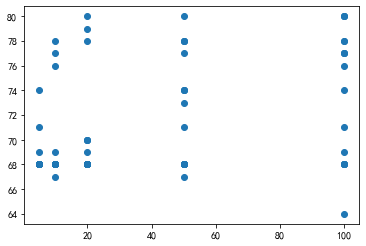

In [60]:
import matplotlib.pyplot as plt
import numpy as np

epoch = [i[1] for i in collection_list]
Accuracy = [i[-1] for i in collection_list]

plt.scatter(epoch, Accuracy)
plt.show()